# Learning Curve

## Setting up

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Load data
dataObj = load_breast_cancer()
X = dataObj.data
y = dataObj.target

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
    stratify=y,
    test_size=0.20,
    random_state=1)

# Constructing a pipeline object (without PCA)
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(random_state=1, max_iter=10000))])

# Constructing a pipeline object (with PCA)
#pipe_lr = Pipeline([('scl', StandardScaler()),
#                    ('pca', PCA(n_components=2)),
#                    ('clf', LogisticRegression(random_state=1, max_iter=10000))])

In [2]:
# Different percentage of data used to construct a learning curve
train_size = np.linspace(0.1, 1.0, 10)
print(train_size)

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [3]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores =\
                learning_curve(estimator=pipe_lr,
                               X=X_train,
                               y=y_train,
                               train_sizes=train_size,
                               cv=10,
                               n_jobs=1)

In [11]:
# Number of training samples
print(train_sizes)

[ 40  81 122 163 204 245 286 327 368 409]


In [5]:
# Training accuracy
df = pd.DataFrame(train_scores)
df.insert(loc=0, column="n_samples", value=train_sizes)
df = df.set_index("n_samples")
display(df)

,0,1,2,3,4,5,6,7,8,9
n_samples,,,,,,,,,,
40,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
81,0.987654,0.987654,0.987654,0.987654,0.987654,0.987654,0.987654,0.987654,0.987654,0.987654
122,0.991803,0.991803,0.991803,0.991803,0.991803,0.991803,0.991803,0.991803,0.991803,0.991803
163,0.993865,0.993865,0.993865,0.993865,0.993865,0.993865,0.993865,0.993865,0.993865,0.993865
204,0.995098,0.985294,0.990196,0.995098,0.995098,0.995098,0.995098,0.995098,0.995098,0.995098
245,0.991837,0.983673,0.987755,0.983673,0.991837,0.979592,0.991837,0.991837,0.991837,0.991837
286,0.993007,0.993007,0.989510,0.989510,0.993007,0.986014,0.993007,0.989510,0.989510,0.989510
327,0.993884,0.984709,0.990826,0.987768,0.987768,0.984709,0.987768,0.990826,0.987768,0.987768
368,0.986413,0.983696,0.986413,0.986413,0.986413,0.983696,0.991848,0.989130,0.986413,0.983696


In [6]:
# Validation accuracy
df = pd.DataFrame(val_scores)
df.insert(loc=0, column="n_samples", value=train_sizes)
df = df.set_index("n_samples")
display(df)

,0,1,2,3,4,5,6,7,8,9
n_samples,,,,,,,,,,
40,0.934783,0.913043,0.913043,0.978261,0.891304,0.955556,0.955556,0.933333,0.933333,0.955556
81,0.847826,0.956522,0.956522,0.978261,0.934783,1.000000,0.977778,0.955556,0.955556,1.000000
122,0.934783,0.978261,0.956522,0.978261,0.891304,0.977778,0.955556,0.933333,0.955556,0.977778
163,0.956522,0.978261,0.956522,1.000000,0.934783,0.955556,0.955556,0.955556,0.933333,1.000000
204,0.913043,0.978261,0.956522,0.978261,0.978261,0.955556,0.955556,0.955556,0.933333,1.000000
245,0.913043,0.978261,0.956522,1.000000,0.934783,0.955556,0.955556,0.955556,0.933333,1.000000
286,0.913043,0.978261,0.956522,1.000000,0.956522,0.977778,0.955556,0.977778,0.933333,1.000000
327,0.934783,1.000000,0.956522,1.000000,1.000000,1.000000,0.955556,0.955556,0.955556,1.000000
368,0.934783,1.000000,0.956522,1.000000,0.978261,1.000000,0.977778,0.955556,0.955556,1.000000


In [7]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

In [8]:
df = pd.DataFrame( \
    data=np.stack((train_sizes, train_mean, train_std, val_mean, val_std), axis=1),
    columns=['n_samples','train_mean','train_std','val_mean','val_std'])
df = df.set_index('n_samples')
display(df)

,train_mean,train_std,val_mean,val_std
n_samples,,,,
40.0,1.000000,0.000000e+00,0.936377,0.024493
81.0,0.987654,2.220446e-16,0.956280,0.041223
122.0,0.991803,1.110223e-16,0.953913,0.026545
163.0,0.993865,2.220446e-16,0.962609,0.022127
204.0,0.993627,3.138786e-03,0.960435,0.023634
245.0,0.988571,4.396053e-03,0.958261,0.026696
286.0,0.990559,2.238855e-03,0.964879,0.026244
327.0,0.988379,2.665993e-03,0.975797,0.024923
368.0,0.986413,2.430509e-03,0.975845,0.022861


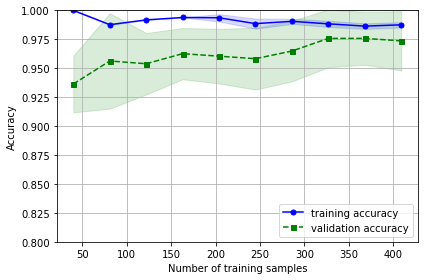

In [9]:
import matplotlib.pyplot as plt

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, val_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 val_mean + val_std,
                 val_mean - val_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.tight_layout()
plt.show()